In [1]:
import pandas as pd
import numpy as np

In [ ]:
# Usign EDA - what are the factors that affect the price of used cars

In [2]:
df = pd.read_csv("Clean_auto.csv")
df.head(10)

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,price,city-L/100km,highway-L/100km,hp_category,fuel-type-diesel,fuel-type-gas,asp-type-std,asp-type-turbo
0,0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,13495.0,11.190476,8.703704,low,0,1,1,0
1,1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,16500.0,11.190476,8.703704,low,0,1,1,0
2,2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,...,154,5000.0,16500.0,12.368421,9.038462,medium,0,1,1,0
3,3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,...,102,5500.0,13950.0,9.791667,7.833333,low,0,1,1,0
4,4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,...,115,5500.0,17450.0,13.055556,10.681818,low,0,1,1,0
5,5,2,122,audi,two,sedan,fwd,front,99.8,0.851994,...,110,5500.0,15250.0,12.368421,9.400000,low,0,1,1,0
6,6,1,158,audi,four,sedan,fwd,front,105.8,0.925997,...,110,5500.0,17710.0,12.368421,9.400000,low,0,1,1,0
7,7,1,122,audi,four,wagon,fwd,front,105.8,0.925997,...,110,5500.0,18920.0,12.368421,9.400000,low,0,1,1,0
8,8,1,158,audi,four,sedan,fwd,front,105.8,0.925997,...,140,5500.0,23875.0,13.823529,11.750000,medium,0,1,0,1
9,10,2,192,bmw,two,sedan,rwd,front,101.2,0.849592,...,101,5800.0,16430.0,10.217391,8.103448,low,0,1,1,0


In [3]:
df.columns

Index(['Unnamed: 0', 'symboling', 'normalized-losses', 'make', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'price', 'city-L/100km', 'highway-L/100km',
       'hp_category', 'fuel-type-diesel', 'fuel-type-gas', 'asp-type-std',
       'asp-type-turbo'],
      dtype='object')

In [4]:
df.drop(columns = ['Unnamed: 0'], inplace = True)
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,price,city-L/100km,highway-L/100km,hp_category,fuel-type-diesel,fuel-type-gas,asp-type-std,asp-type-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,13495.0,11.190476,8.703704,low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,16500.0,11.190476,8.703704,low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,154,5000.0,16500.0,12.368421,9.038462,medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,102,5500.0,13950.0,9.791667,7.833333,low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,115,5500.0,17450.0,13.055556,10.681818,low,0,1,1,0


In [5]:
%%capture
! pip install seaborn

In [6]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [7]:
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
price                float64
city-L/100km         float64
highway-L/100km      float64
hp_category           object
fuel-type-diesel       int64
fuel-type-gas          int64
asp-type-std           int64
asp-type-turbo         int64
dtype: object


In [8]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,asp-type-std,asp-type-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.139896,-0.007992,-0.182196,0.075776,0.279719,-0.082391,0.066171,-0.029807,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029800,0.055127,-0.114713,0.217300,0.239544,0.133999,0.238567,0.181189,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493203,0.157964,0.250313,0.371297,-0.360233,0.584642,0.476153,0.577576,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608941,0.123913,0.159733,0.579688,-0.286035,0.690628,0.657373,0.707108,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544879,0.188814,0.189867,0.614972,-0.245852,0.751265,0.673363,0.736728,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180327,-0.060822,0.259737,-0.086901,-0.309913,0.135486,0.003811,0.084301,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644041,0.167412,0.156433,0.758001,-0.279350,0.834415,0.785353,0.836921,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572516,0.205806,0.028889,0.822636,-0.256753,0.872335,0.745059,0.783465,0.070779,-0.070779,-0.110040,0.110040
bore,-0.139896,-0.029800,0.493203,0.608941,0.544879,0.180327,0.644041,0.572516,1.000000,-0.055390,0.001250,0.566786,-0.267338,0.543154,0.554726,0.559197,0.054435,-0.054435,-0.227782,0.227782
stroke,-0.007992,0.055127,0.157964,0.123913,0.188814,-0.060822,0.167412,0.205806,-0.055390,1.000000,0.187854,0.097598,-0.063720,0.082267,0.036285,0.047199,0.241033,-0.241033,-0.218190,0.218190


In [10]:
df[['bore','stroke','compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001250,0.566786
stroke,-0.055390,1.000000,0.187854,0.097598
compression-ratio,0.001250,0.187854,1.000000,-0.214392
horsepower,0.566786,0.097598,-0.214392,1.000000


In [ ]:
# understanding the linear relationship of variables with Price using Scatter plots

(0.0, 53780.791195515594)

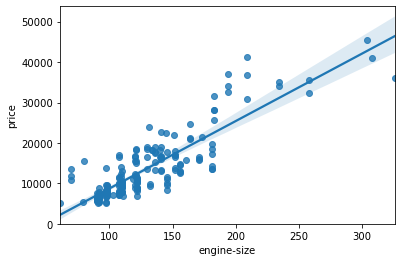

In [11]:
#engine-size and price relationship
sb.regplot(x = 'engine-size', y = 'price', data = df)
plt.ylim(0,)

In [12]:
df[['engine-size','price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


(0.0, 47708.642429065905)

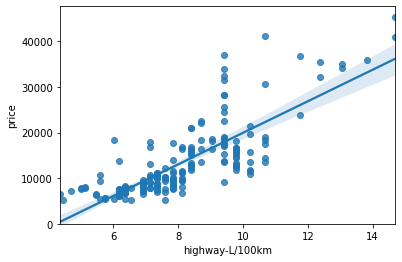

In [13]:
sb.regplot(x = 'highway-L/100km', y = 'price', data = df)
plt.ylim(0,)

In [14]:
df[['highway-L/100km','price']].corr()

,highway-L/100km,price
highway-L/100km,1.000000,0.801118
price,0.801118,1.000000


(0.0, 47414.1)

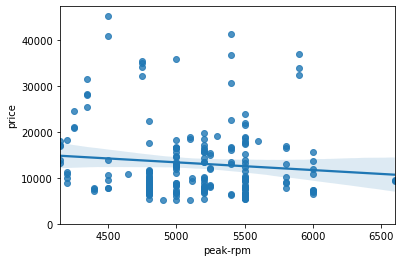

In [16]:
sb.regplot(x = 'peak-rpm', y = 'price', data = df) #shows weak relationship as line is almost horizontal
plt.ylim(0,)

In [17]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101542
price,-0.101542,1.000000


In [18]:
df[['stroke','price']].corr()

,stroke,price
stroke,1.000000,0.082267
price,0.082267,1.000000


(0.0, 47414.1)

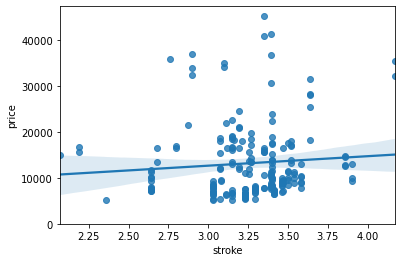

In [19]:
sb.regplot(x = 'stroke', y = 'price', data = df)
plt.ylim(0,)

In [ ]:
# how categorical variables influence the price of used cars - box plots

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

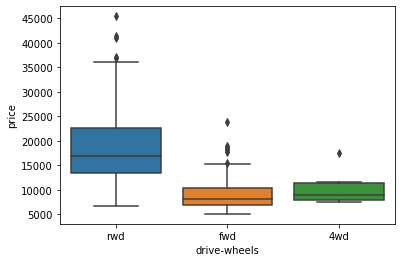

In [20]:
sb.boxplot(x = 'drive-wheels', y = 'price', data = df)

<AxesSubplot:xlabel='num-of-doors', ylabel='price'>

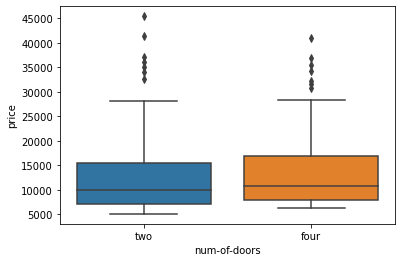

In [21]:
sb.boxplot(x = 'num-of-doors', y = 'price', data = df)

<AxesSubplot:xlabel='body-style', ylabel='price'>

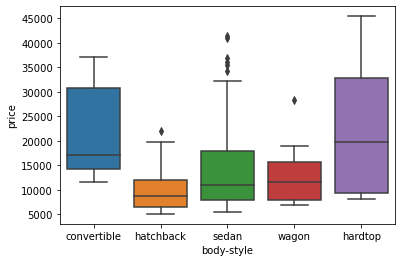

In [24]:
sb.boxplot(x = 'body-style', y = 'price', data = df)

<AxesSubplot:xlabel='engine-location', ylabel='price'>

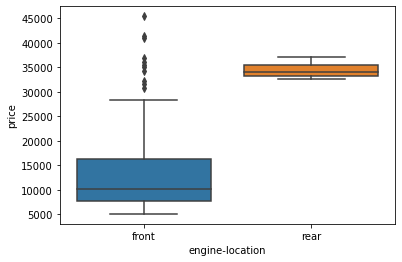

In [25]:
sb.boxplot(x = 'engine-location', y = 'price', data = df)

<AxesSubplot:xlabel='num-of-cylinders', ylabel='price'>

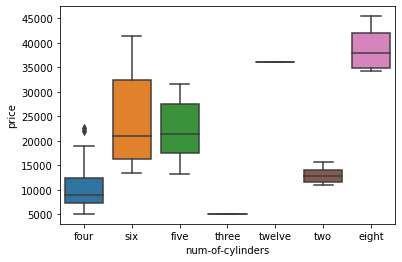

In [27]:
sb.boxplot(x = 'num-of-cylinders', y = 'price', data = df)

In [28]:
df.describe(include='all') 

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,price,city-L/100km,highway-L/100km,hp_category,fuel-type-diesel,fuel-type-gas,asp-type-std,asp-type-turbo
count,201.000000,201.00000,201,201,201,201,201,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201,201.000000,201.000000,201.000000,201.000000
unique,NaN,NaN,22,2,5,3,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,four,sedan,fwd,front,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,low,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,115,94,118,198,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,153,NaN,NaN,NaN,NaN
mean,0.840796,122.00000,NaN,NaN,NaN,NaN,NaN,98.797015,0.837102,0.915126,...,103.393035,5117.587940,13207.129353,9.944145,8.044957,NaN,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,NaN,NaN,NaN,NaN,NaN,6.066366,0.059213,0.029187,...,37.365623,478.113178,7947.066342,2.534599,1.840739,NaN,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,NaN,NaN,NaN,NaN,NaN,86.600000,0.678039,0.837500,...,48.000000,4150.000000,5118.000000,4.795918,4.351852,NaN,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,NaN,NaN,NaN,NaN,NaN,94.500000,0.801538,0.890278,...,70.000000,4800.000000,7775.000000,7.833333,6.911765,NaN,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,NaN,NaN,NaN,NaN,NaN,97.000000,0.832292,0.909722,...,95.000000,5117.587940,10295.000000,9.791667,7.833333,NaN,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,NaN,NaN,NaN,NaN,NaN,102.400000,0.881788,0.925000,...,116.000000,5500.000000,16500.000000,12.368421,9.400000,NaN,0.000000,1.000000,1.000000,0.000000


In [30]:
df.describe(include = ['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,hp_category
count,201,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8,3
top,toyota,four,sedan,fwd,front,ohc,four,mpfi,low
freq,32,115,94,118,198,145,157,92,153


In [34]:
drive_wheels_count = df['drive-wheels'].value_counts().to_frame()
drive_wheels_count.rename(columns = {
    'drive-wheels' : 'Count'
}, inplace = True)
drive_wheels_count

,Count
fwd,118
rwd,75
4wd,8


In [35]:
drive_wheels_count.index.name = 'drive-wheels'
drive_wheels_count

,Count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [37]:
engine_loc = df['engine-location'].value_counts().to_frame()
engine_loc.rename(columns = {'engine-location': 'count'}, inplace = True)
engine_loc.index.name = 'engine-loc-type'
engine_loc

,count
engine-loc-type,
front,198
rear,3


In [38]:
df_group_1 = df[['drive-wheels', 'body-style','price']]
df_group_1

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
196,rwd,sedan,16845.0
197,rwd,sedan,19045.0
198,rwd,sedan,21485.0
199,rwd,sedan,22470.0


In [39]:
df_group_1 = df_group_1.groupby(by ='drive-wheels', as_index = False).mean()
df_group_1

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [43]:
df_group_style = df[['drive-wheels', 'body-style','price']]
df_group_style = df_group_style.groupby(by = ['drive-wheels','body-style'], as_index = False).mean()
df_group_style

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [45]:
group_pivot = df_group_style.pivot(index = 'drive-wheels', columns = 'body-style')
group_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [46]:
group_pivot.fillna(0, inplace = True)
group_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [47]:
df_group_2 = df[['drive-wheels', 'body-style','price']]
df_group_2 = df_group_2.groupby(by = 'body-style', as_index = False).mean()
df_group_2

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


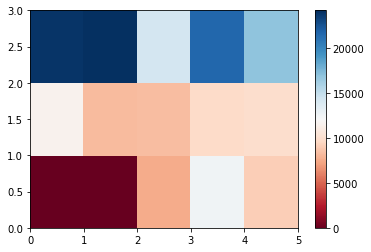

In [50]:
# visualizing using heatmaps
plt.pcolor(group_pivot, shading = 'flat', cmap='RdBu')
plt.colorbar()
plt.show()

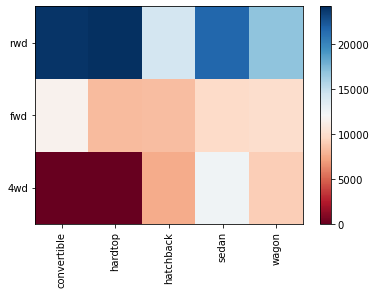

In [51]:
fig, ax = plt.subplots()
im = ax.pcolor(group_pivot, cmap='RdBu')

#label names
row_labels = group_pivot.columns.levels[1]
col_labels = group_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(group_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(group_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [52]:
# calculating pearson coefficient of two vaiables of int64 or float64 type
df.columns

Index(['symboling', 'normalized-losses', 'make', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'price', 'city-L/100km', 'highway-L/100km',
       'hp_category', 'fuel-type-diesel', 'fuel-type-gas', 'asp-type-std',
       'asp-type-turbo'],
      dtype='object')

In [53]:
from scipy import stats

In [54]:
#wheelbase vs price
pearson_coeff, p_value = stats.pearsonr(df['wheel-base'],df['price'])
print("The Pearson co-efficient is:",pearson_coeff,"with a p-value of:",p_value)

The Pearson co-efficient is: 0.5846418222655081 with a p-value of: 8.076488270732989e-20


<AxesSubplot:xlabel='wheel-base', ylabel='price'>

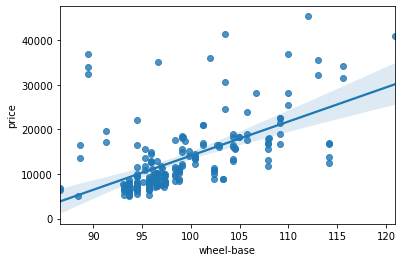

In [55]:
sb.regplot(x = 'wheel-base', y = 'price', data = df)

In [56]:
pearson_coeff, p_value = stats.pearsonr(df['horsepower'],df['price'])
print("The Pearson co-efficient is:",pearson_coeff,"with a p-value of:",p_value)

The Pearson co-efficient is: 0.8097290352560285 with a p-value of: 5.924001027593172e-48


<AxesSubplot:xlabel='horsepower', ylabel='price'>

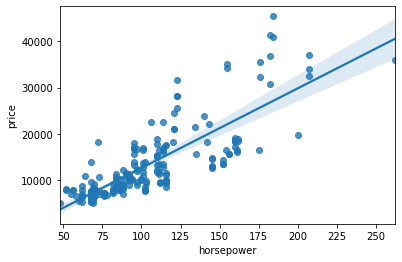

In [57]:
sb.regplot(x = 'horsepower', y = 'price', data = df)

In [58]:
pearson_coeff, p_value = stats.pearsonr(df['city-L/100km'],df['price'])
print("The Pearson co-efficient is:",pearson_coeff,"with a p-value of:",p_value)

The Pearson co-efficient is: 0.7898975136626941 with a p-value of: 3.903106400940024e-44


<AxesSubplot:xlabel='city-L/100km', ylabel='price'>

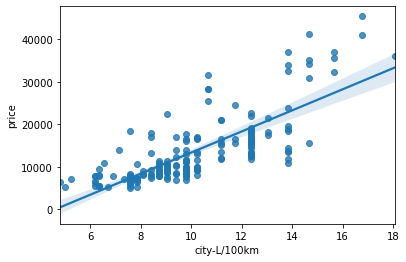

In [59]:
sb.regplot(x = 'city-L/100km', y = 'price', data = df)

In [60]:
# ANOVA(Analysis of Variance)
df_group_1.get_group('4wd')['price']

AttributeError: 'DataFrame' object has no attribute 'get_group'

In [61]:
df_group = df[['drive-wheels','body-style','price']]

In [65]:
df_group_set = df_group[['drive-wheels','price']].groupby(by = ['drive-wheels'])
df_group_set.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [66]:
df_group_set.get_group('rwd')['price']

0      13495.0
1      16500.0
2      16500.0
9      16430.0
10     16925.0
        ...   
196    16845.0
197    19045.0
198    21485.0
199    22470.0
200    22625.0
Name: price, Length: 75, dtype: float64

In [68]:
#ANOVA using f_oneway from stats
f_val, p_val = stats.f_oneway(df_group_set.get_group('4wd')['price'],df_group_set.get_group('rwd')['price'],df_group_set.get_group('fwd')['price'])
print("ANOVA result- Fval:",f_val,"P-val:",p_val)

ANOVA result- Fval: 67.95406500780402 P-val: 3.3945443577150617e-23


In [70]:
df_carmake = df[['make','price']]
df_carmake.head(10)

,make,price
0,alfa-romero,13495.0
1,alfa-romero,16500.0
2,alfa-romero,16500.0
3,audi,13950.0
4,audi,17450.0
5,audi,15250.0
6,audi,17710.0
7,audi,18920.0
8,audi,23875.0
9,bmw,16430.0


In [78]:

carmake_grp = df_carmake.groupby(by = 'make',as_index = False).mean().sort_values('price', ascending = False)
carmake_grp
#plt.bar(x = 'make', height = 'price', data = df_carmake )



,make,price
7,jaguar,34600.000000
9,mercedes-benz,33647.000000
15,porsche,31400.500000
2,bmw,26118.750000
21,volvo,18063.181818
1,audi,17859.166667
10,mercury,16503.000000
0,alfa-romero,15498.333333
13,peugot,15489.090909
17,saab,15223.333333


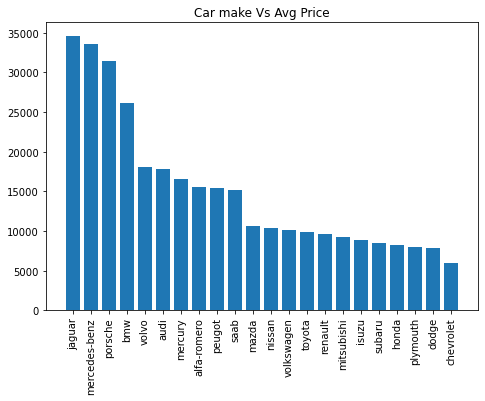

In [84]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x = 'make', height = 'price', data = carmake_grp)
ax.set_title('Car make Vs Avg Price')
plt.xticks(rotation=90)
plt.show()

In [85]:
df_carmake_grp = df_carmake.groupby(by = 'make')
df_carmake_grp.head(5)

,make,price
0,alfa-romero,13495.0
1,alfa-romero,16500.0
2,alfa-romero,16500.0
3,audi,13950.0
4,audi,17450.0
...,...,...
190,volvo,12940.0
191,volvo,13415.0
192,volvo,15985.0
193,volvo,16515.0


In [86]:
df_carmake_grp.get_group('honda')['price']

29     6479.0
30     6855.0
31     5399.0
32     6529.0
33     7129.0
34     7295.0
35     7295.0
36     7895.0
37     9095.0
38     8845.0
39    10295.0
40    12945.0
41    10345.0
Name: price, dtype: float64

In [88]:
# car make honda Vs Subaru
f_val, p_val = stats.f_oneway(df_carmake_grp.get_group('honda')['price'],df_carmake_grp.get_group('subaru')['price'])
print("ANOVA result- Fval:",f_val,"P-val:",p_val)

ANOVA result- Fval: 0.19744030127462606 P-val: 0.6609478240622193


In [89]:
# car make honda Vs Jaguar
f_val, p_val = stats.f_oneway(df_carmake_grp.get_group('honda')['price'],df_carmake_grp.get_group('jaguar')['price'])
print("ANOVA result- Fval:",f_val,"P-val:",p_val)

ANOVA result- Fval: 400.925870564337 P-val: 1.0586193512077862e-11
